In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet


In [ ]:

# Load dataset (upload Superstore dataset manually in Colab before running)
data = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')


In [ ]:

# Convert Order Date to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])



In [ ]:

# Aggregate sales data by month
data = data.groupby(pd.Grouper(key='Order Date', freq='M')).sum()
data = data[['Sales']]
data.columns = ['Total Sales']

data.reset_index(inplace=True)
data.rename(columns={'Order Date': 'Date'}, inplace=True)

data.set_index('Date', inplace=True)

<ipython-input-12-f627eb0f7267>:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
# Business Performance Dashboard
fig1 = px.line(data, x=data.index, y="Total Sales", title="Sales Trend Over Time")
fig1.show()

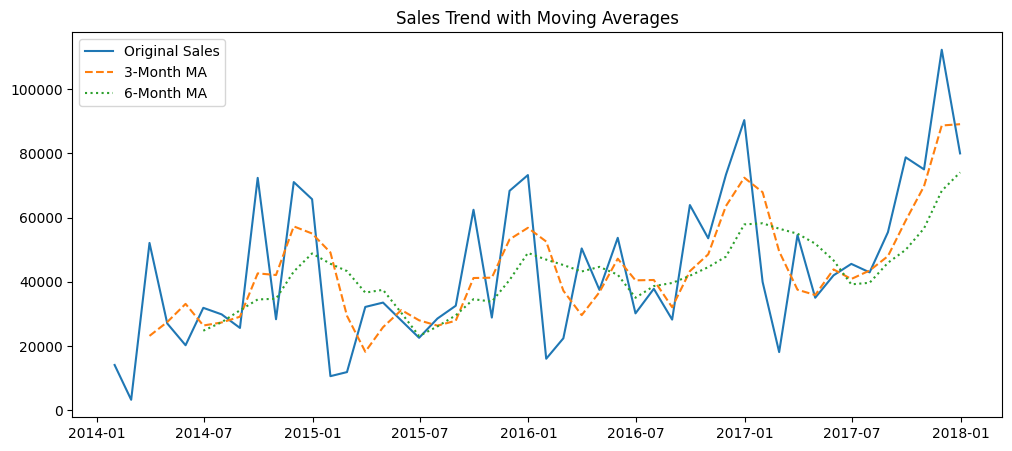

In [ ]:

# Moving Average Trend Analysis
data["MA_3"] = data["Total Sales"].rolling(window=3).mean()
data["MA_6"] = data["Total Sales"].rolling(window=6).mean()

plt.figure(figsize=(12, 5))
plt.plot(data.index, data["Total Sales"], label="Original Sales")
plt.plot(data.index, data["MA_3"], label="3-Month MA", linestyle="dashed")
plt.plot(data.index, data["MA_6"], label="6-Month MA", linestyle="dotted")
plt.legend()
plt.title("Sales Trend with Moving Averages")
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxi21atcj/i2qqb0ux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxi21atcj/fq4g8675.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87572', 'data', 'file=/tmp/tmpxi21atcj/i2qqb0ux.json', 'init=/tmp/tmpxi21atcj/fq4g8675.json', 'output', 'file=/tmp/tmpxi21atcj/prophet_modellxgq0ez8/prophet_model-20250129072657.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:26:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:26:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

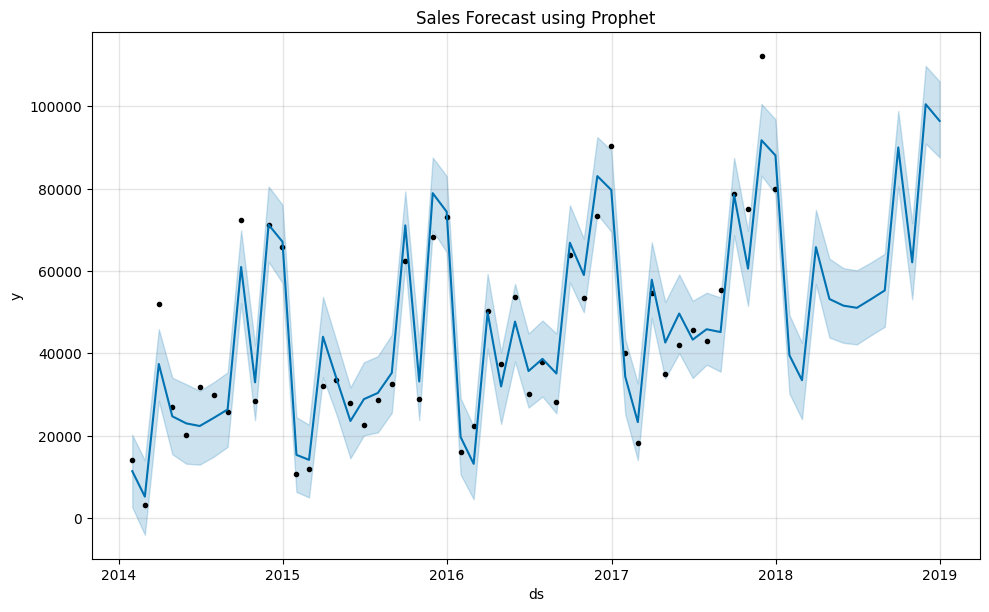

In [ ]:

# Prophet Forecasting
prophet_data = data.reset_index()[["Date", "Total Sales"]]
prophet_data.columns = ["ds", "y"]

model = Prophet()
model.fit(prophet_data)

future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

fig2 = model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.show()




/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency ME will be used.



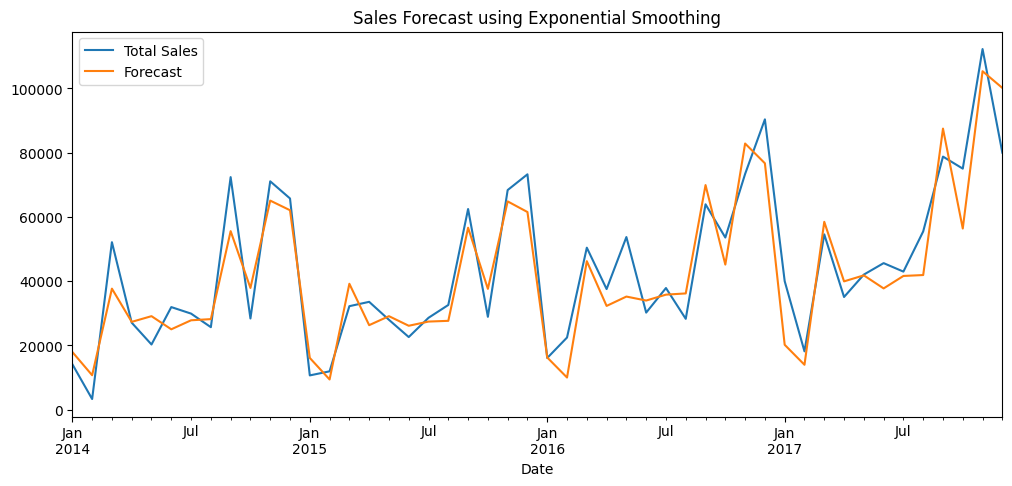

In [ ]:
# Exponential Smoothing Forecasting
model_es = ExponentialSmoothing(
    data["Total Sales"],
    seasonal="mul",  # Change to 'add' if needed
    seasonal_periods=12,
    use_boxcox=True  # Stabilizes variance
).fit()

data["Forecast"] = model_es.fittedvalues

data[["Total Sales", "Forecast"]].plot(figsize=(12, 5), title="Sales Forecast using Exponential Smoothing")
plt.show()